# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [13]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [61]:

# Calculando a média e arredondando para inteiro
media = df['Preco_Normal']
df['Preco_Normal'].mean()

2070.9972899728996

In [29]:
#Seu código aqui para a mediana
df['Preco_Normal'].median()

1269.0

Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [49]:
#Seu código aqui
desvio_padrao_por_preco = df.groupby('Marca')['Preco_Normal'].std().reset_index()
desvio_padrao_por_preco

,Marca,Preco_Normal
0,1+1 Soprole,NaN
1,Activia,955.264239
2,Agrosano,494.974747
3,Alcafood,2298.097039
4,Alimentos Shen,70.710678
...,...,...
151,Vanart,0.000000
152,Viennetta Bresler,0.000000
153,Yogu - Yogu,1298.355113
154,Zerolacto,1064.927541


In [51]:
df.describe()

,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto
count,1107.000000,1107.000000,1107.000000,1107.000000
mean,2070.997290,522.269196,372.257453,68.109304
std,2961.257627,1339.559852,1239.475017,241.158310
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,0.000000,0.000000
75%,2849.000000,0.000000,0.000000,0.000000
max,19788.000000,14550.000000,18899.000000,4349.000000


Nessa lista foi possivel identificar uma grande diferença da media para mediana

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

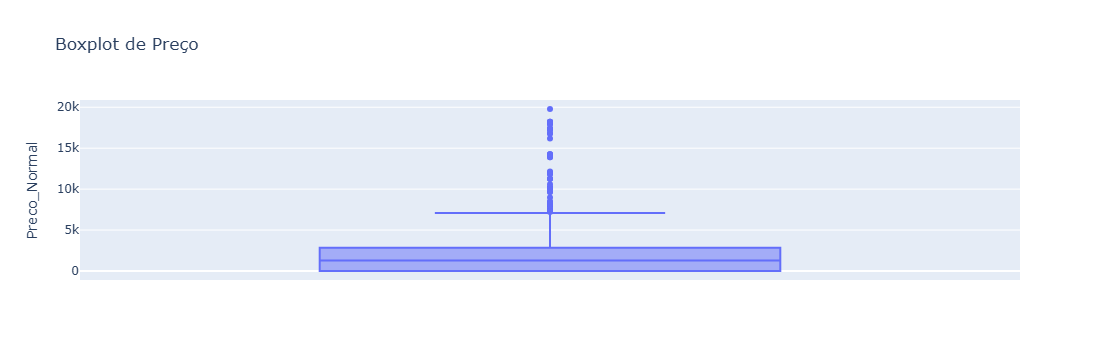

In [69]:
#Seu código aqui
# Criando o boxplot de idade
fig = px.box(df, y='Preco_Normal', title='Boxplot de Preço')

# Exibindo o gráfico
fig.show()

Indetificamos muita outliers

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

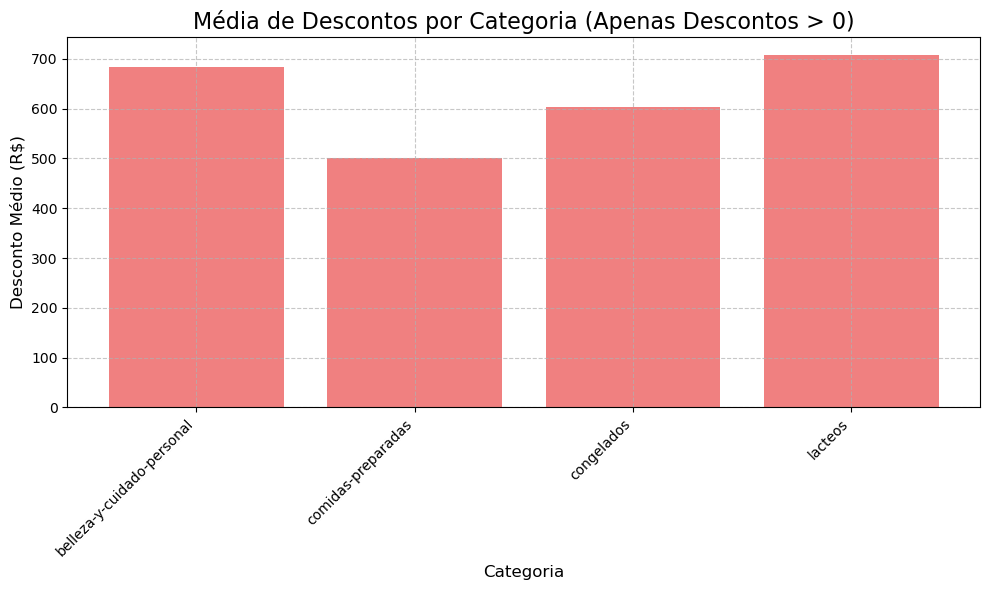

In [104]:
# Filtrar apenas os descontos maiores que 0 para calcular a média
df_filtered = df[df['Desconto'] > 0]

# Calcular a média de descontos por categoria e arredondar para inteiros
media_descontos = df_filtered.groupby('Categoria')['Desconto'].mean().round(0).astype(int)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_descontos.index, media_descontos, color='lightcoral')

# Adicionar título e rótulos
plt.title('Média de Descontos por Categoria (Apenas Descontos > 0)', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Desconto Médio (R$)', fontsize=12)

# Rotacionar os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar grades
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

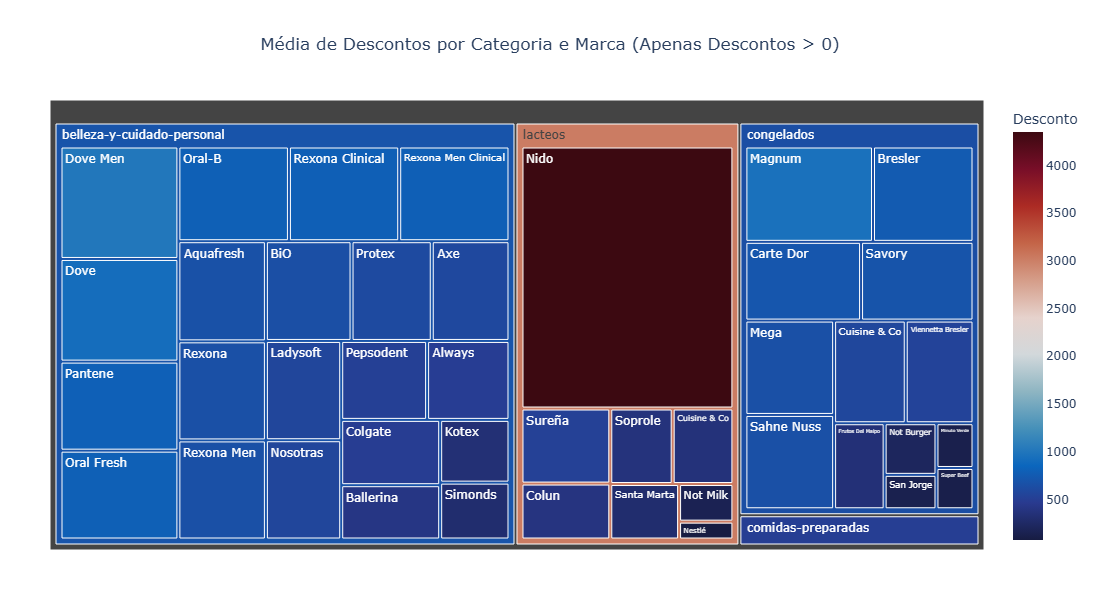

In [110]:
# Seu código aqui
# Agrupar por Categoria e Marca e calcular a média de Desconto, arredondando para inteiros
media_descontos = df_filtered.groupby(['Categoria', 'Marca'])['Desconto'].mean().round(0).astype(int).reset_index()

# Criar o treemap interativo com Plotly
fig = px.treemap(
    media_descontos,
    path=['Categoria', 'Marca'],  # Hierarquia: Categoria -> Marca
    values='Desconto',  # Tamanho dos retângulos baseado na média de desconto
    color='Desconto',  # Cor dos retângulos baseado na média de desconto
    color_continuous_scale='balance',  # Escala de cores moderna e atraente (amarelo-verde-azul)
    title='Média de Descontos por Categoria e Marca (Apenas Descontos > 0)'
)

# Ajustar o layout para melhor visualização
fig.update_layout(
    width=1000,  # Aumentar a largura do gráfico
    height=600,  # Aumentar a altura do gráfico
    margin=dict(l=50, r=50, t=100, b=50),  # Ajustar margens
    title_x=0.5  # Centralizar o título
)

# Exibir o gráfico interativo
fig.show()
